<a href="https://colab.research.google.com/github/kadiyalamani15/AQI-VAR/blob/main/nullity_asssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Read every months data by traversing the folders
# Upsample them to 15 min freq
# Append to the year dataframe [Ex: df_stationName_year]
# For each station, four dataframes corresponding to each year should be present

In [2]:
# loop over every station, every year, delete the first 11 rows and pass the data to upsample function
# the upsampled data should be appended to the main dataframe

In [3]:
# Import required Libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import os
from os import listdir
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 2)
plt.rc("figure", figsize=(12, 12))
plt.rcParams['axes.labelpad'] = 20


In [4]:
# First traverse of the folders
for station in sorted(os.listdir(f"raw_data")):
  station_year_df = pd.DataFrame()
  if station == "1600":
    factors = 6 # Hard-coded based on data observation
  elif station == "1601":
    factors = 11 # Hard-coded based on data observation
  else:
    continue # to ignore hidden files
  print(f"Station: {station}, factors: {factors}")

  # Second traverse of the folders
  for year in sorted(os.listdir(f"raw_data/{station}")):
    if not year.startswith('.'): # ignoring hidden files
      station_year_df = pd.DataFrame() # initializing a dataframe

      # Third traverse of the folders
      for month in sorted(os.listdir(f"raw_data/{station}/{year}")):
        if not month.startswith('.'): # ignoring hidden files
          print(f"Processing raw_data/{station}/{year}/{month} file ...")
          # Reading the excel file
          c = pd.read_excel(f"raw_data/{station}/{year}/{month}")
          d = c.iloc[11:,:factors+1] # Slicing the data for useful information
          #print(c.iloc[10:11,:factors+1].values[0])
          d.columns = c.iloc[10:11,:factors+1].values[0] # Assign columns to the new dataframe
          d.columns = d.columns.str.lstrip('(')
          #print(d.columns)
          #break

          # Checking for Data presence in the current dataframe
          try:
            d[['date','time']] = d['Date & Time'].str.split(' ', expand=True)
          # If no data is present
          except ValueError as NoDataError:
            print(f"No Data recorded in file: {station}-{year}-{month}")
          # On presence of data the below processing needs to be done
          else:
            d.iloc[:,-2] = pd.to_datetime(d.iloc[:,-2])

            # Looping over the rows of the dataframe
            for i in range(len(d)):
              # Checking for the error timestamp
              if "24:00" in d.iloc[i,-1]:
                #print(d.iloc[i,-2].month)
                rev_day = d.iloc[i,-2].day + 1 # If true, incrementing the date by 1

                # looking for date errors
                try:
                  d.iloc[i,-2].replace(day=rev_day)
                # Month end error
                except ValueError  as dayError:
                  print("Month end error!")
                  # So incrementing the month and initializing the date to 1
                  rev_month = d.iloc[i,-2].month + 1

                  # looking for year end errors
                  try:
                    d.iloc[i,-2].replace(day=1, month=rev_month)
                  except ValueError as yearError:
                    print("Year end error!")
                    rev_year = d.iloc[i,-2].year + 1 # incrementing year, setting date and month to 1
                    d.iloc[i,-2] = d.iloc[i,-2].replace(day=1, month=1, year=rev_year)
                    d.iloc[i,-1] = d.iloc[i,-1].replace("24:00","00:00")
                  else:
                    d.iloc[i,-2] = d.iloc[i,-2].replace(day=1, month=rev_month) # else increment month and set date to 1
                    d.iloc[i,-1] = d.iloc[i,-1].replace("24:00","00:00")
                # If month end error persists
                else:
                  d.iloc[i,-2] = d.iloc[i,-2].replace(day=rev_day)
                  d.iloc[i,-1] = d.iloc[i,-1].replace("24:00","00:00")
                  #print(d.iloc[i,-2].replace(day= rev_day))

              # continue the loop if the "24:00" is not present in the column  
              else:
                continue

            # updating the date time column with the new values
            d['Date & Time'] = d['date'].astype(str) + ' ' + d['time']
            # deleting the columns that were expanded using date time split
            d.drop(['date','time'], axis=1, inplace=True)

          # stripping "(U)" char in the cells beside values
          for j in range(0, d.shape[1]):
                d.iloc[:,j] = d.iloc[:,j].str.rstrip('(U)')

          # replacing all the invalid chars in the cells with null values
          d = d.replace(regex=['(D)','(F)','(I)','(M)','(C)','(N)','(W)','(G)','(Z)'], value=np.nan)

          # appending the monthly data to year dataframe
          station_year_df = station_year_df.append(d)
          #break

        else:
          continue
      # setting index to perform resampling
      station_year_df = station_year_df.set_index('Date & Time')
      station_year_df.index = pd.DatetimeIndex(station_year_df.index)
      station_year_df = station_year_df.resample('15T').asfreq()

      # Save year data to excel
      station_year_df.to_excel(f"{station}_{year}.xlsx")
      print(f"\nSaving {station} station's {year} year processed data to excel ...\n")
      #break
      #station_year_df = pd.DataFrame()
    else:
      continue

Station: 1600, factors: 6
Processing raw_data/1600/2019/01.xlsx file ...
Month end error!
Processing raw_data/1600/2019/02.xlsx file ...
Month end error!
Processing raw_data/1600/2019/03.xlsx file ...
Processing raw_data/1600/2019/04.xlsx file ...
Month end error!
Processing raw_data/1600/2019/05.xlsx file ...
Processing raw_data/1600/2019/06.xlsx file ...
Month end error!
Processing raw_data/1600/2019/07.xlsx file ...
Month end error!
Processing raw_data/1600/2019/08.xlsx file ...
Processing raw_data/1600/2019/09.xlsx file ...
Processing raw_data/1600/2019/10.xlsx file ...
Processing raw_data/1600/2019/11.xlsx file ...
Month end error!
Processing raw_data/1600/2019/12.xlsx file ...
Month end error!
Year end error!

Saving 1600 station's 2019 year processed data to excel ...

Processing raw_data/1600/2020/01.xlsx file ...
Month end error!
Processing raw_data/1600/2020/02.xlsx file ...
Month end error!
Processing raw_data/1600/2020/03.xlsx file ...
Month end error!
Processing raw_data/1

In [5]:
# Visual Analysis of the Null Values

def nullity_plot(df, station, year):

  ax = msno.matrix(df, freq='M')
  ax.set_title(f"AQMS {station} {year}", fontsize=30, y=1.2)
  plt.savefig(f"{station}_{year}_null_plot.png")
  plt.show()

  return None

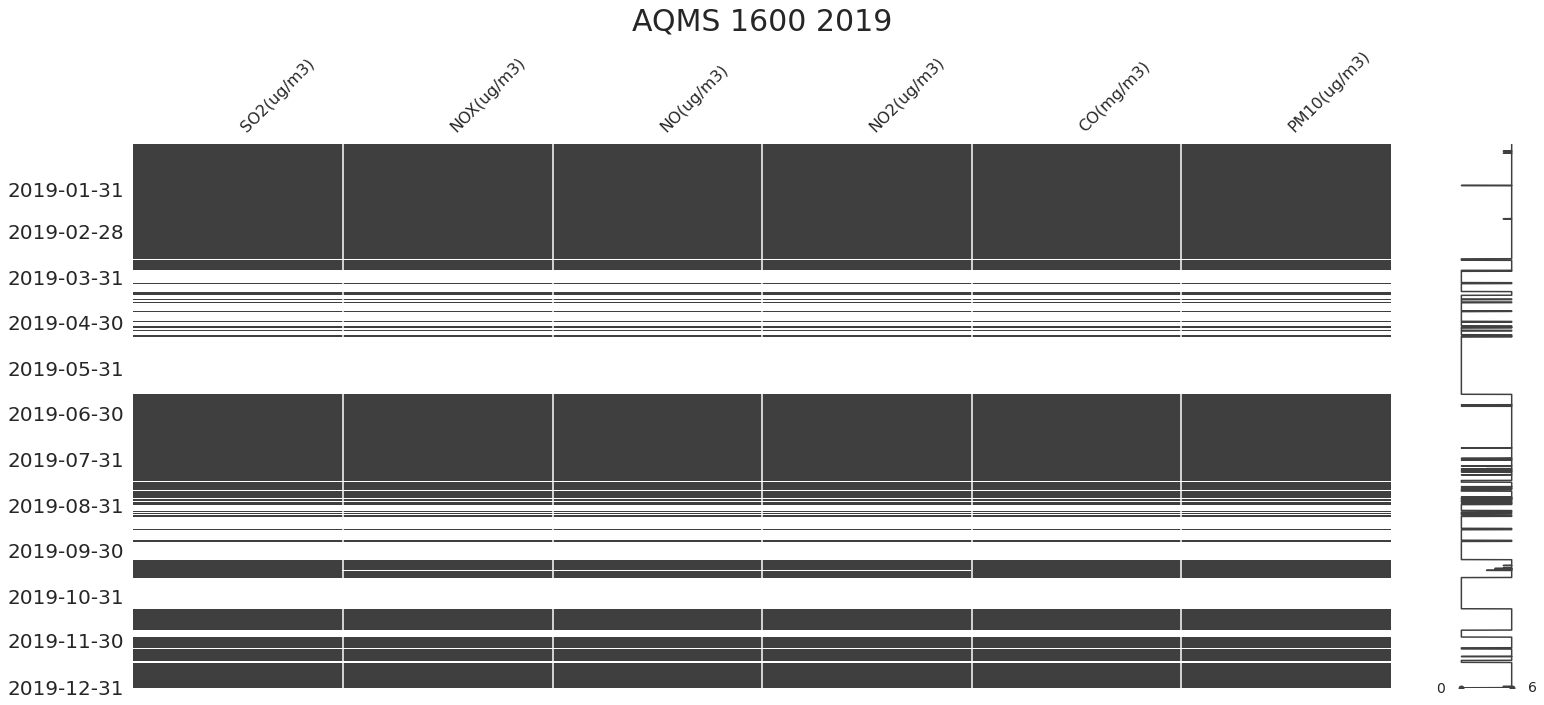

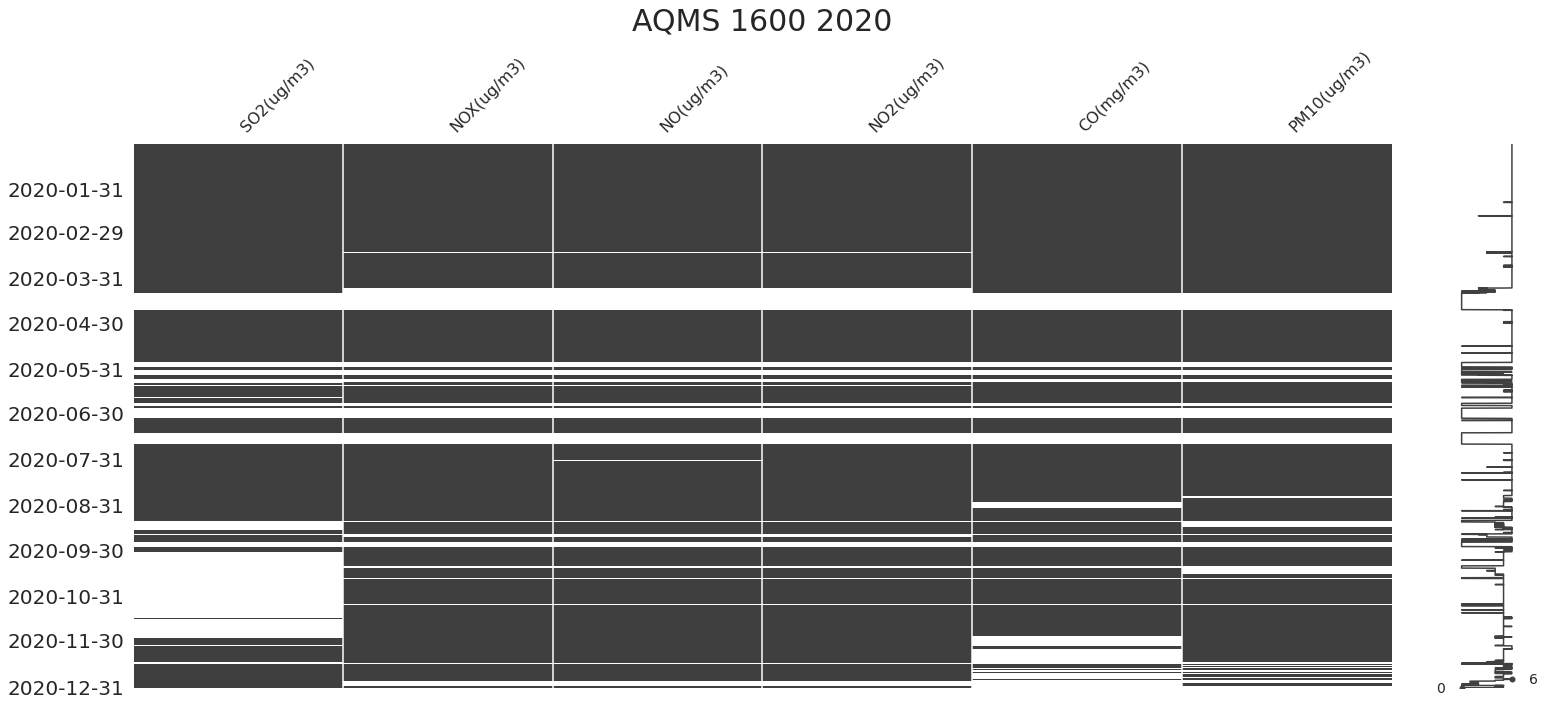

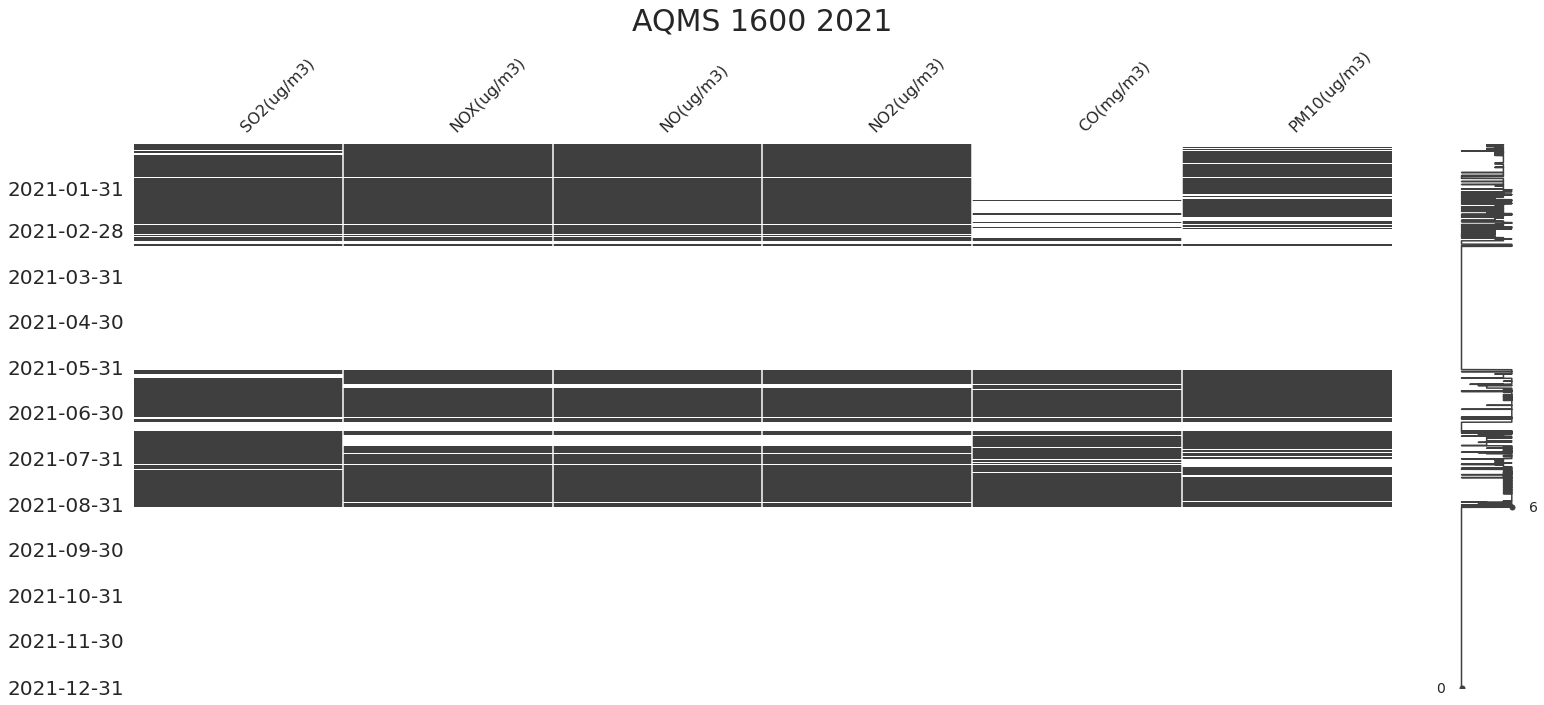

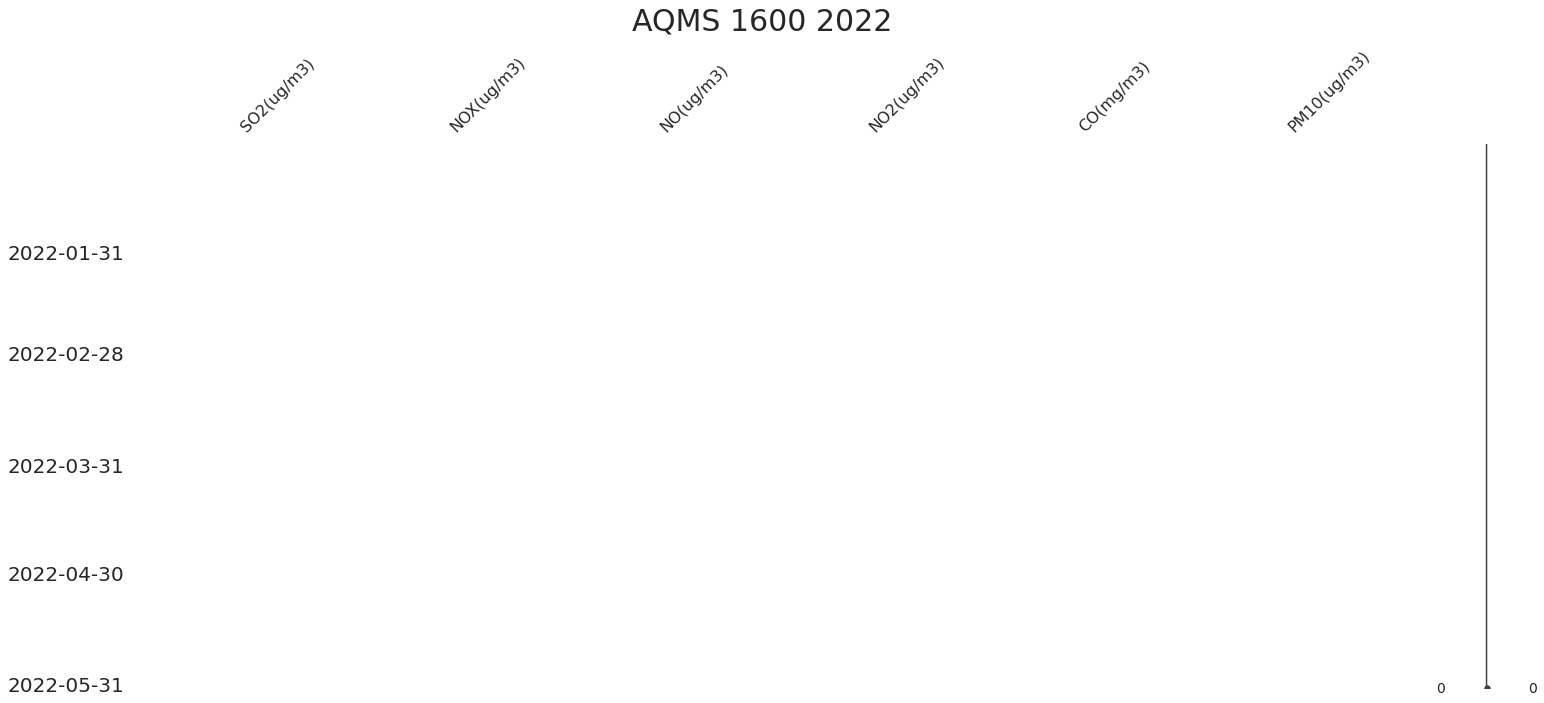

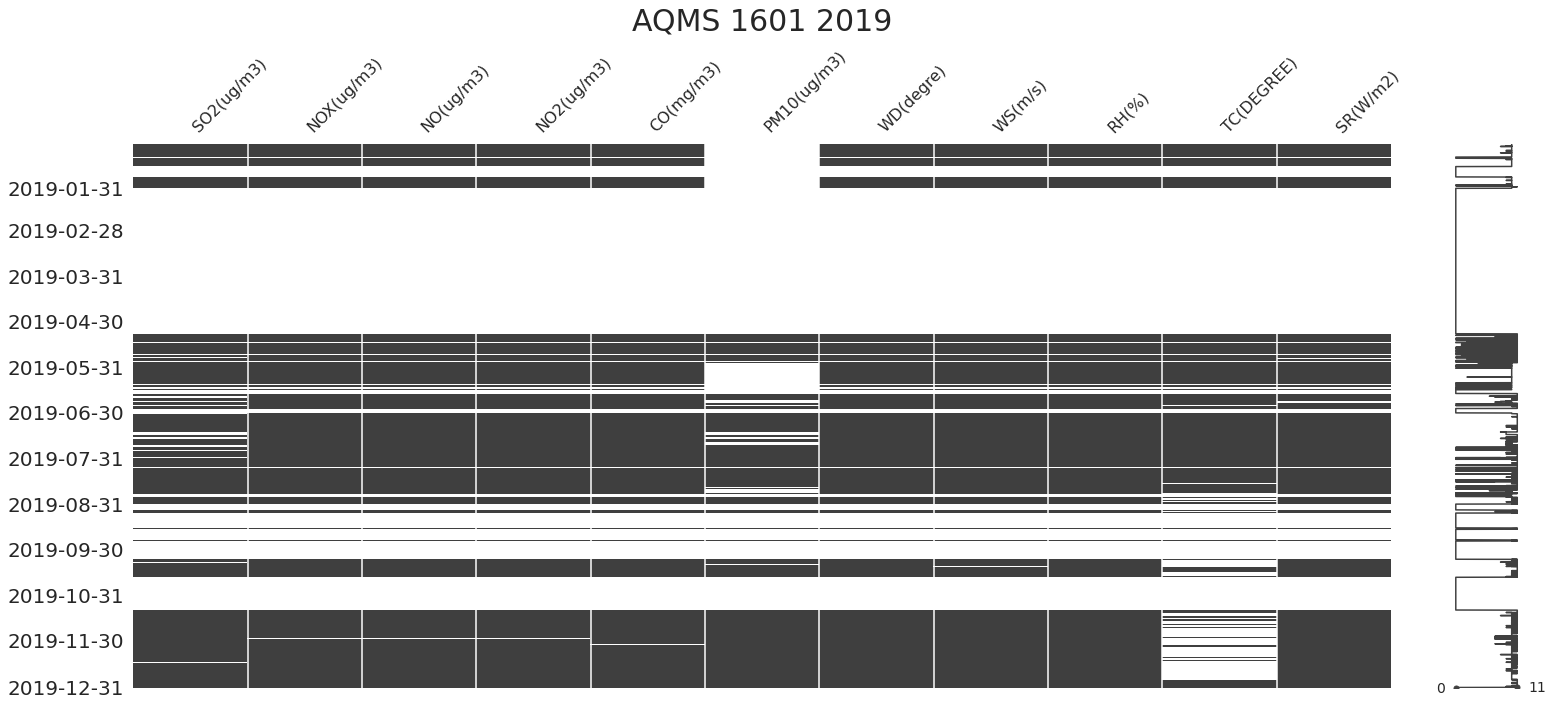

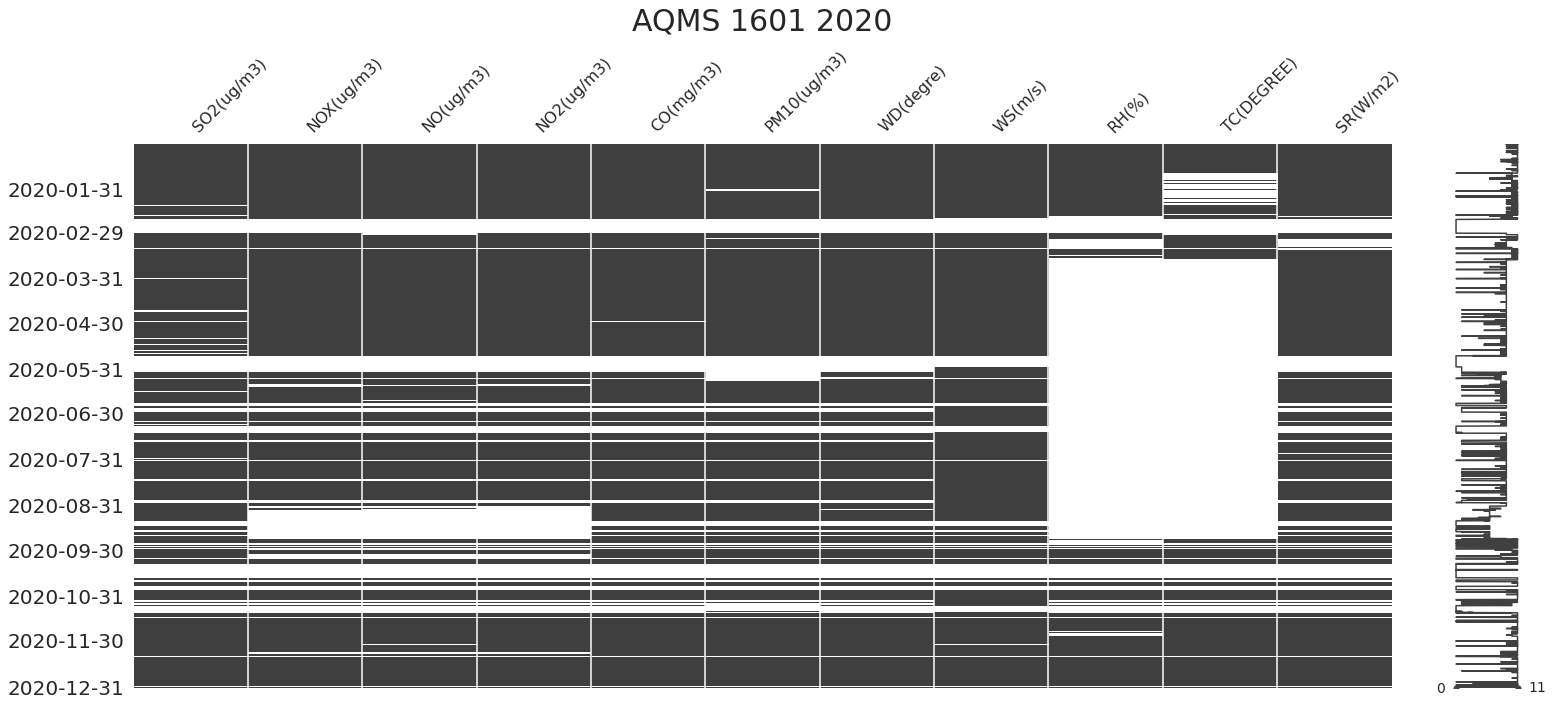

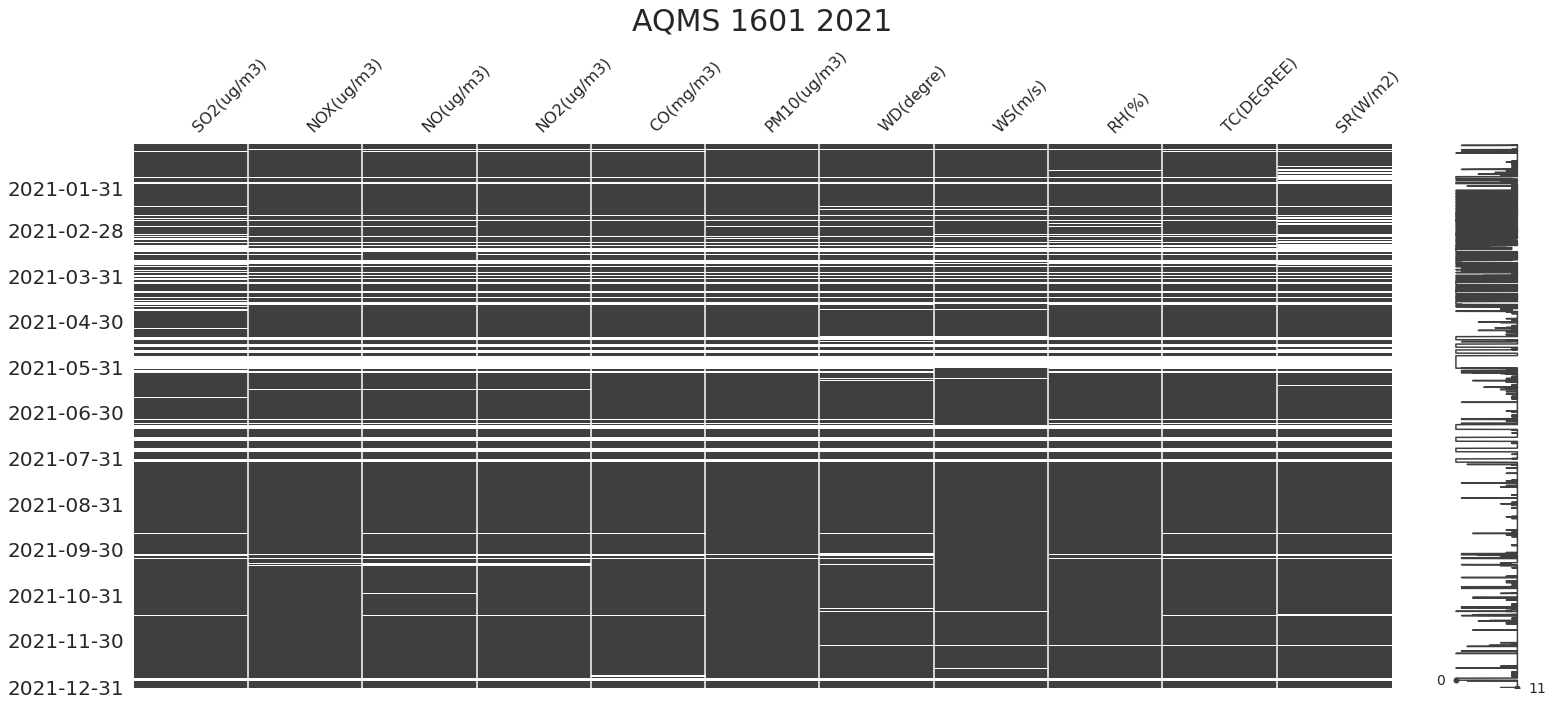

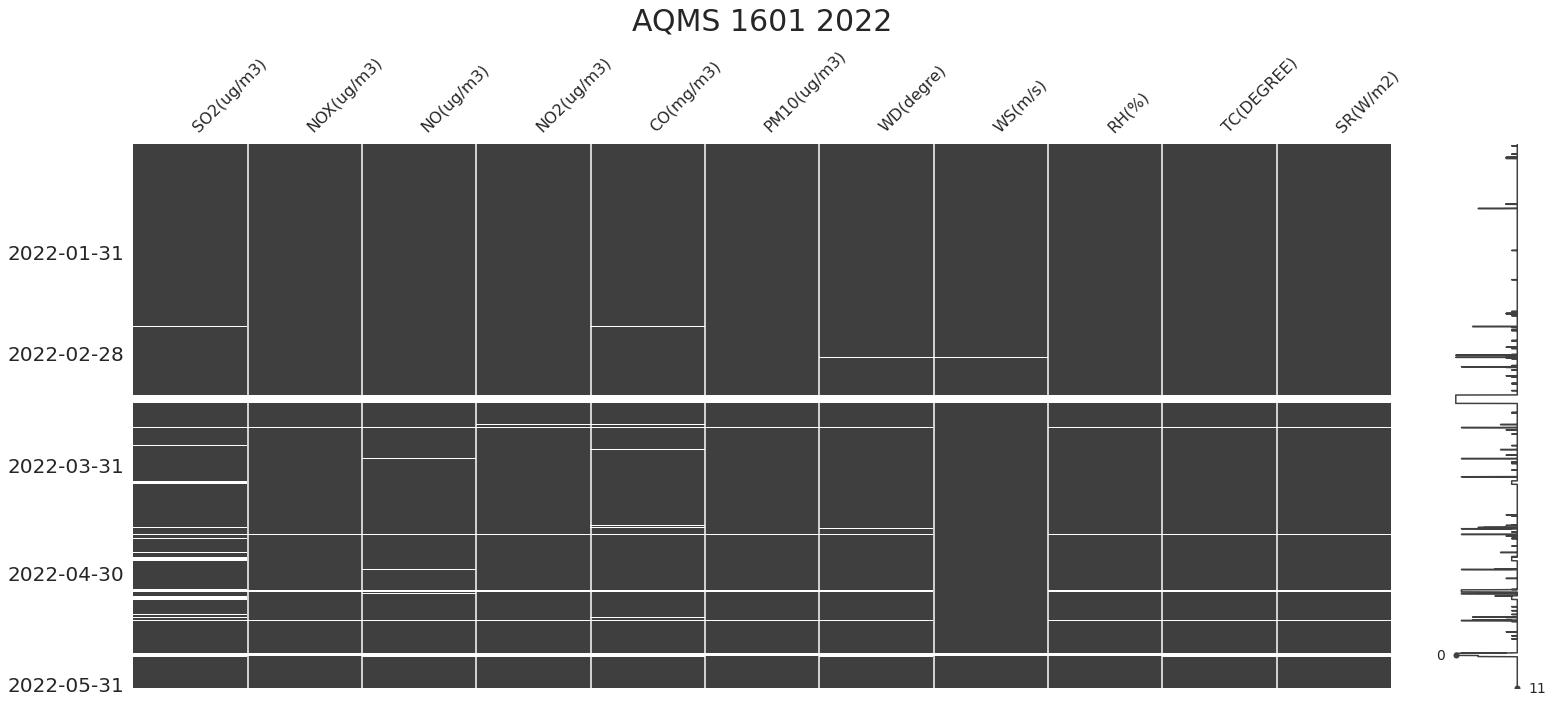

In [6]:
for file in sorted(os.listdir()):
  if file.endswith('.xlsx'):
    df = pd.read_excel(file, parse_dates=['Date & Time'], index_col='Date & Time')
    station = f"{file[:4]}"
    year = f"{file[5:9]}"
    nullity_plot(df, station, year)
    #break

In [7]:
# Null Percentages Station wise

n1600 = pd.DataFrame()
n1601 = pd.DataFrame()
for file in sorted(os.listdir()):
  if file.endswith('.xlsx'):
    df = pd.read_excel(file, parse_dates=['Date & Time'], index_col='Date & Time')
    if f"{file[:4]}" == "1600":
      year = f"{file[5:9]}"
      n1600[year] = df.isnull().mean() * 100
      #break
    else:
      #break
      year = f"{file[5:9]}"
      n1601[year] = df.isnull().mean() * 100

In [8]:
n1600

,2019,2020,2021,2022
SO2(ug/m3),38.390411,28.782445,61.212225,100.0
NOX(ug/m3),38.447489,14.455260,62.688874,100.0
NO(ug/m3),38.376142,14.534950,62.703182,100.0
NO2(ug/m3),38.378995,14.443875,62.697459,100.0
CO(mg/m3),38.407534,20.767873,76.290636,100.0
PM10(ug/m3),38.573059,17.381034,66.778274,100.0


In [12]:
n1600.to_excel("null_per_1600.xlsx")

In [9]:
n1601

,2019,2020,2021,2022
SO2(ug/m3),50.289034,20.562955,17.920101,5.732616
NOX(ug/m3),47.885188,24.359631,14.783654,2.738687
NO(ug/m3),47.916667,24.889003,15.473329,3.262969
NO2(ug/m3),47.885188,24.627163,15.238668,3.118102
CO(mg/m3),47.965316,18.903689,15.195742,3.490618
PM10(ug/m3),60.825893,20.417805,14.354396,2.738687
WD(degre),47.799336,18.752846,15.501946,3.552704
WS(m/s),47.951007,14.113730,13.450092,2.386865
RH(%),48.005380,64.862250,15.393201,2.745585
TC(DEGREE),60.908883,66.535747,15.149954,2.993929


In [13]:
n1601.to_excel("null_per_1601.xlsx")

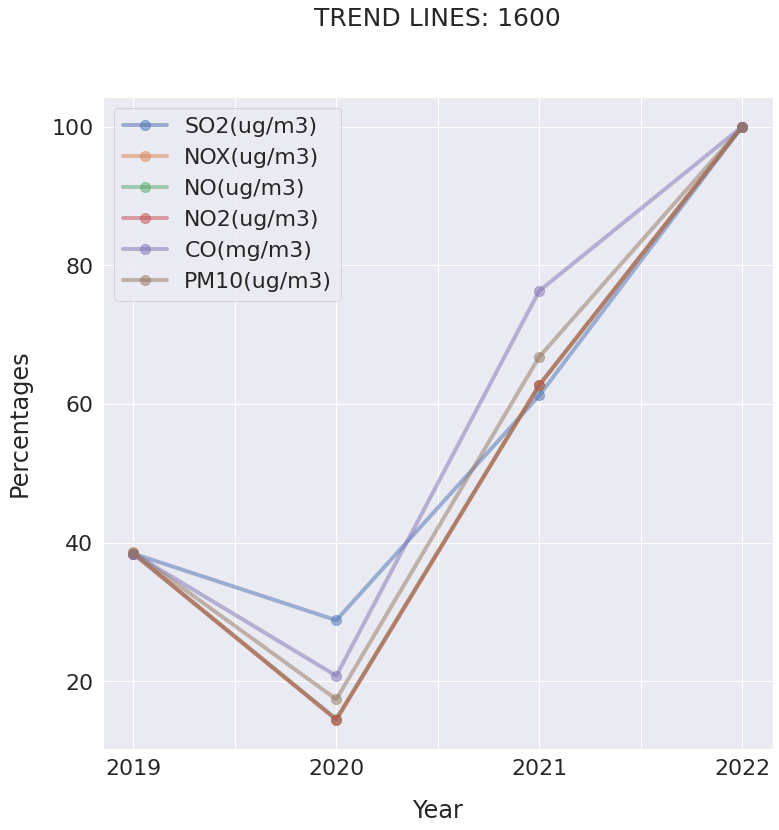

In [10]:
# missing data percentage trend lines

n1600.transpose().plot(alpha=0.5, linewidth=4, marker='o', ms=10)
plt.title("TREND LINES: 1600", fontsize=25, y=1.1)
plt.xlabel('Year')
plt.ylabel('Percentages')
plt.savefig("1600_null_trend.png")
plt.show()

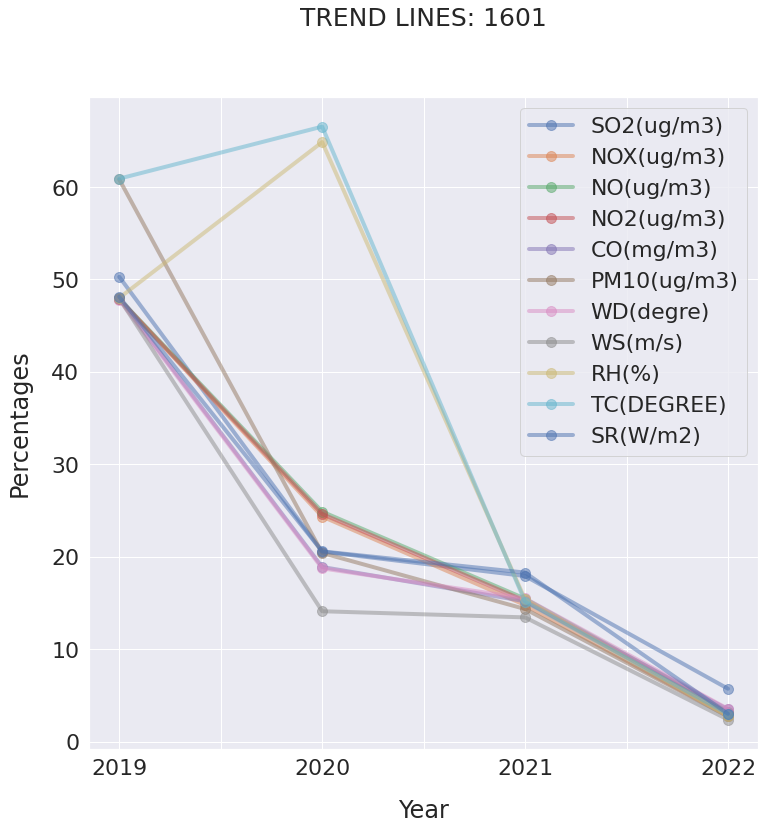

In [11]:
# missing data percentage trend lines

n1601.transpose().plot(alpha=0.5, linewidth=4, marker='o', ms=10)
plt.title("TREND LINES: 1601", fontsize=25, y=1.1)
plt.xlabel('Year')
plt.ylabel('Percentages')
plt.savefig("1601_null_trend.png")
plt.show()